# Domain Generalization for Pathology

This notebook initiates an exploratory data analysis (EDA) of the CAMELYON17 dataset, which is a critical first step in a domain generalization study.

In the context of this project, each of the five contributing medical centers is treated as a separate 'domain'. The core challenge of domain generalization is to train a robust model on data from these source domains so that it can accurately make predictions on data from a completely new, unseen hospital.

This initial analysis is designed to characterize and quantify the "domain shift" across the different centers by investigating:
*   The distribution of Whole Slide Images (WSIs) and patients across each domain (hospital).
*   The prevalence and distribution of metastasis labels within the training set.
*   Potential imbalances or biases in how data and labels are distributed among the domains, which is a key challenge for generalization.

The script executed below will generate and save visualizations of these distributions and produce a master CSV file. This file consolidates all the necessary information and explicitly annotates the source hospital as the 'domain' for each slide, setting the stage for training and evaluating domain generalization models.


Generating a map of the complete 1000-slide C17 dataset...
Loading labels from official source: live/pub/10.5524/100001_101000/100439/CAMELYON17/training/stage_labels.csv
Plot saved to /autofs/space/crater_001/projects/micropath/domain-pathology/figures/dataset-summary.png


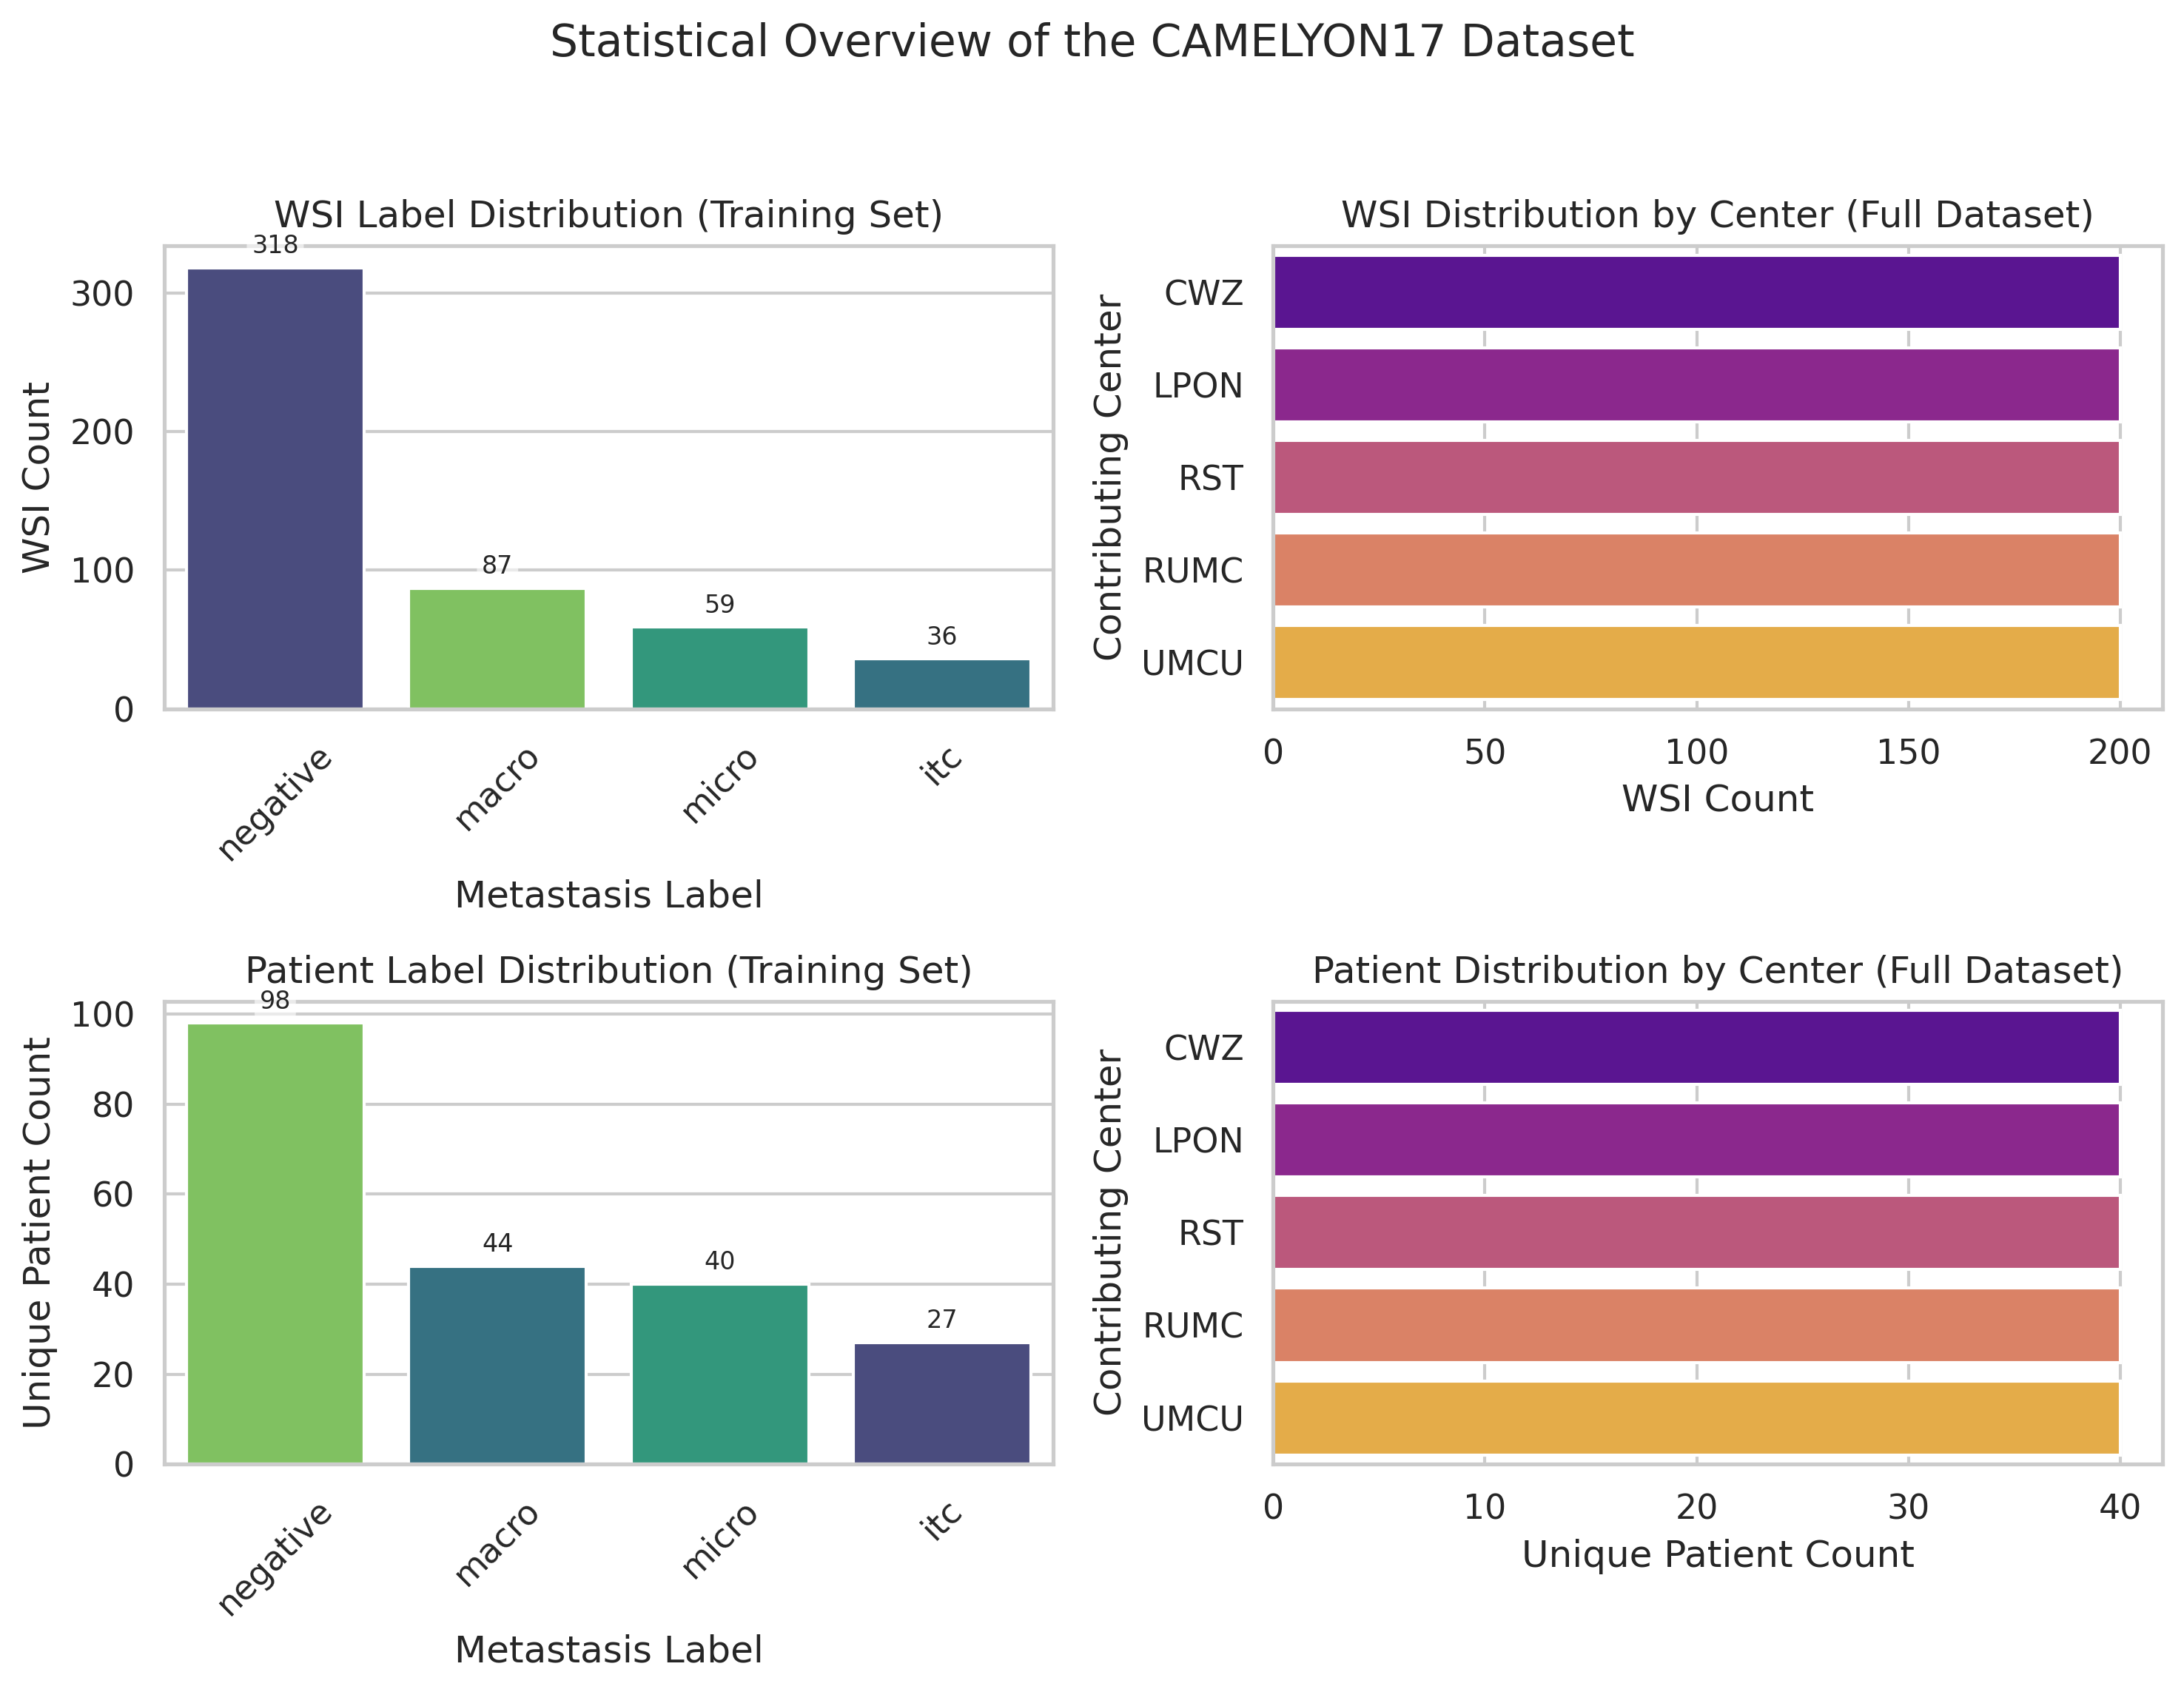

Processed master dataset saved to /autofs/space/crater_001/projects/micropath/domain-pathology/labels/camelyon17-labels.csv
Summary statistics for Training Set saved to /autofs/space/crater_001/projects/micropath/domain-pathology/figures/dataset-summary.csv


In [2]:
from source.analysis import summarize_dataset

summarize_dataset.generate_dataset_statistics()

# Download Data Files

In this section we download the raw TIF files (Whole Slide Images) from the CAMELYON17 dataset. These images are high-resolution scans of lymph node tissue biopsies obtained from different medical centers. Each TIF file contains a complete microscopic scan of a lymph node section that will be used to detect metastatic tissue.

These images form the core data that we'll analyze to study domain generalization across different hospitals' imaging systems and protocols.


In [ ]:
from source.dataset import download_dataset
download_dataset.download_tif_files()

# Visualize Example WSI Images

In this section, we visualize example Whole Slide Images (WSIs) from each medical center in the CAMELYON17 dataset. This visualization helps us understand the visual characteristics and potential differences between the different domains (hospitals) in our dataset.

The visualization will show thumbnail images organized by site, allowing us to observe any visual variations in tissue preparation, staining, imaging protocols, or other factors that might contribute to domain shift.


Starting simple CAMELYON17 WSI thumbnail visualization...
Searching for WSI files in: /autofs/space/crater_001/datasets/public/CAMELYON17/WSI
Found first WSI file: /autofs/space/crater_001/datasets/public/CAMELYON17/WSI/patient_122_node_3.tif
Creating thumbnail for: patient_122_node_3.tif


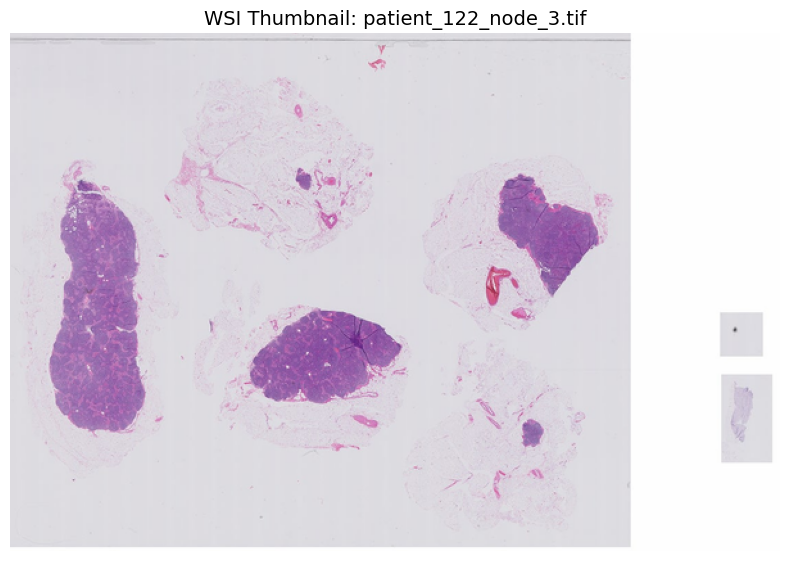

Visualization complete!


In [3]:
from source.visualization import visualize_example_wsi

visualize_example_wsi.visualize_wsi_thumbnail()

# Visual Analysis of WSI Thumbnails

The visualization above displays thumbnail images of lymph node tissue sections from different medical centers in the CAMELYON17 dataset. Each row represents a different hospital/site, and we can observe several important characteristics:

**Visual Observations:**
- **Staining Variations**: Different sites may show variations in H&E (Hematoxylin and Eosin) staining intensity and color balance, which can affect the pink and purple hues of the tissue
- **Tissue Preparation**: Variations in tissue sectioning thickness and preparation protocols may result in different tissue textures and clarity
- **Image Quality**: Different scanning equipment and protocols across hospitals may lead to variations in image resolution, brightness, and contrast
- **Tissue Types**: While all images show lymph node tissue, there may be variations in the specific anatomical regions captured and the amount of surrounding tissue included

These visual differences represent the core challenge of domain generalization - training a model that can perform well across all these visual variations while still accurately detecting metastatic tissue regardless of the source hospital's imaging characteristics.
